In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import os.path
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
traindf = pd.read_csv('./data/train.csv')
testdf = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

Data wrangling
Check for image size -> needs to be consistent, pixels can be resized in pytorch and tensorflow, image size in kb & mb need to be the same size, 
	Make a df with image size and then also check LxW 
Extract pixel values and look at their distributions 
Exploratory data analysis:
Other things can do:
	Need to remove noise

Feature engineering on image data is difficult and is optional 
Initiate Deep Learning Neural network on Pytorch  Pytorch first (difficult at first) and then Tensorflow if it is too hard. Kush reccommeneded to use fastai on pytorch 


In [3]:
traindf.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
testdf

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [5]:
sample

,posting_id,matches
0,test_2255846744,test_2255846744
1,test_3588702337,test_3588702337
2,test_4015706929,test_4015706929


In [6]:
# Create path for images 
TRAIN_PATH = "./data/train_images"
TEST_PATH = "./data/test_images"

traindf["path"] = [os.path.join(TRAIN_PATH,s) for s in traindf["image"]]
testdf["path"] = [os.path.join(TEST_PATH,s) for s in testdf["image"]]

traindf.to_csv("traindf.csv",index=False)
testdf.to_csv("testdf.csv",index=False)

In [7]:
traindf.head(3)

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./data/train_images/0000a68812bc7e98c42888dfb1...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./data/train_images/00039780dfc94d01db8676fe78...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./data/train_images/000a190fdd715a2a36faed16e2...


In [8]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
 5   path         34250 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


- no NaN data

In [9]:
for col in traindf.columns:
    print(col + ":" + str(len(traindf[col].unique())))

posting_id:34250
image:32412
image_phash:28735
title:33117
label_group:11014
path:32412


- This shows the number of unique values in each column 
- As the total rows is 34250 indicated by posting_id, every other column have duplicates

### 1.1 Image Visualization 

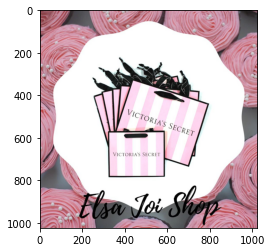

In [10]:
# Plot image using open cv
img = cv2.imread(traindf["path"].iloc[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

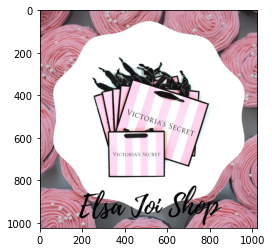

In [11]:
# plot image using matplotlib
image = plt.imread(traindf['path'].iloc[0])
plt.imshow(image)

In [12]:
# Verify the shape of the image 
image.shape

(1024, 1024, 3)

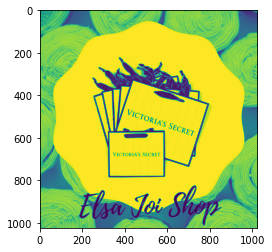

In [13]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
plt.imshow(red)

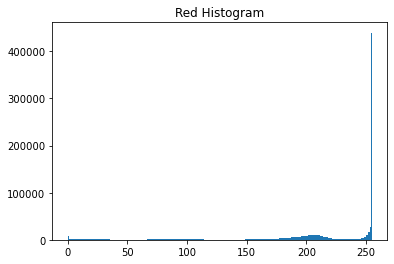

In [14]:
plt.hist(red.ravel(), bins=256)
plt.title('Red Histogram')
plt.show()

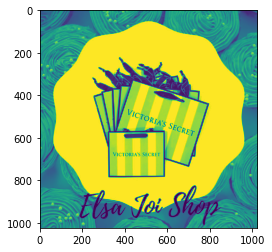

In [15]:
plt.imshow(green)

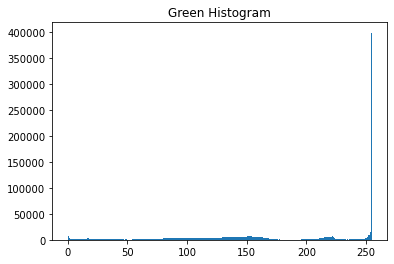

In [16]:
plt.hist(green.ravel(), bins=256)
plt.title('Green Histogram')
plt.show()

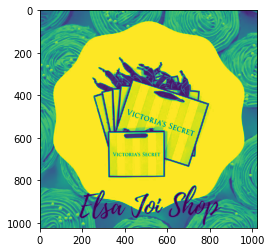

In [17]:
plt.imshow(blue)

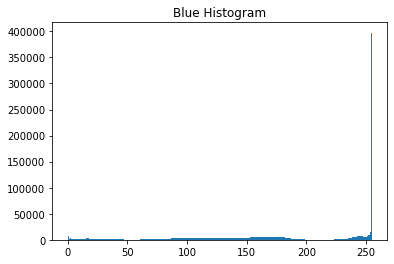

In [18]:
plt.hist(blue.ravel(), bins=256)
plt.title('Blue Histogram')
plt.show()

In [19]:
# Identify a matchikng label group for the first image in the train dataset
tempdf = traindf[traindf['label_group'] == traindf['label_group'].iloc[0]]
tempdf

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./data/train_images/0000a68812bc7e98c42888dfb1...
33161,train_2278313361,f83b49a86a0ee8592e3bf0204da3fbdf.jpg,ac63931c3d4b42f6,PAPER BAG VICTORIA SECRET,249114794,./data/train_images/f83b49a86a0ee8592e3bf0204d...


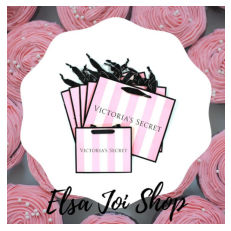

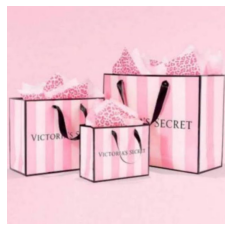

In [20]:
# Display both images - share title of Paper Bag Victoria Secret
for a in tempdf["path"]:
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img)
    plt.axis("off")

(-0.5, 1023.5, 1023.5, -0.5)

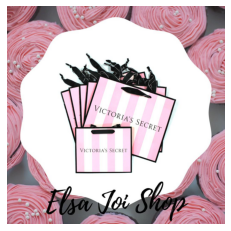

In [21]:
# Using matplotlib
image1 = plt.imread(tempdf['path'].iloc[1])
plt.imshow(image)
plt.axis('off')

(-0.5, 639.5, 639.5, -0.5)

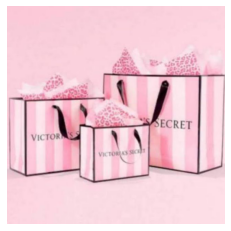

In [22]:
plt.imshow(image1)
plt.axis('off')

- We can see that this label group represents Victoria Secret and being a paper bag 

In [23]:
# Check if image shape is consistent in the train and test files
def getShape(images_paths):
    shape = cv2.imread(images_paths[0]).shape
    for image_path in images_paths:
        image_shape = cv2.imread(image_path).shape
        if (image_shape!=shape):
            return "Different image shape"
        else:
            return "Same image shape " + str(shape)

In [24]:
getShape(traindf["path"])

'Same image shape (1024, 1024, 3)'

In [25]:
getShape(testdf["path"])

'Same image shape (1024, 1024, 3)'

Shape of the images (pixel L, pixel W, color channel) are the same in the test and train df, but differ between each other. Note 3 color channel represents RGB aka all photos are colored.  

In [26]:
# Resize test images to (1024,1024,3), rsz = resize
import PIL 
from PIL import Image

In [27]:
rszpath = r"./data/test_images"
for file in os.listdir(rszpath):
    rsz_img = rszpath+"/"+file
    img = Image.open(rsz_img)
    img = img.resize((1024,1024))
    img.save(rsz_img)
    
testdf["rszpath"] = [os.path.join(rszpath,s) for s in testdf["image"]]

In [28]:
testdf

,posting_id,image,image_phash,title,path,rszpath
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...,./data/test_images/0006c8e5462ae52167402bac1c2...,./data/test_images/0006c8e5462ae52167402bac1c2...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...,./data/test_images/0007585c4d0f932859339129f70...,./data/test_images/0007585c4d0f932859339129f70...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng,./data/test_images/0008377d3662e83ef44e1881af3...,./data/test_images/0008377d3662e83ef44e1881af3...


In [29]:
getShape(testdf['rszpath'])

'Same image shape (1024, 1024, 3)'

In [30]:
getShape(traindf['path'])

'Same image shape (1024, 1024, 3)'

In [31]:
getShape(testdf['path'])

'Same image shape (1024, 1024, 3)'

- Now testdf image shape = traindf image shape, I wanted to keep path the original and rszpath resized, but it looks like both are resized. This is not an issue, but didn't quite get what I wanted.

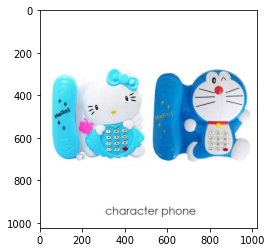

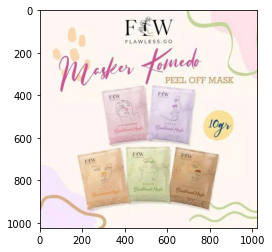

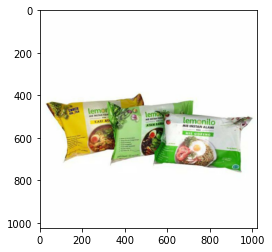

In [32]:
# Displaying the 3 images in the testdf
for a in testdf["rszpath"]:
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img)

### 2.1 Understanding the label groups

In [33]:
# Countingi the number of images in each label group 
label = traindf.groupby('label_group')['image'].count().reset_index()
label.columns = ['label_group','image_number']
label

,label_group,image_number
0,258047,3
1,297977,2
2,645628,12
3,801176,2
4,887886,2
...,...,...
11009,4292154092,2
11010,4292520070,11
11011,4292939171,2
11012,4293276364,2


In [34]:
sortlabel = label.sort_values('image_number')
sortlabel

,label_group,image_number
3764,1471548468,2
8718,3381177724,2
4946,1934657835,2
8720,3381497963,2
4943,1932824351,2
...,...,...
2606,994676122,51
8037,3113678103,51
1445,562358068,51
9370,3627744656,51


- The minimum number of images in a group is 2 and the maxmium is 51

In [35]:
# Counting the label_groups for each image_number
imagecount = label.groupby('image_number').count().reset_index()
imagecount.columns = ['image_number', 'counts']
imagecount

,image_number,counts
0,2,6979
1,3,1779
2,4,862
3,5,468
4,6,282
5,7,154
6,8,118
7,9,91
8,10,48
9,11,38


- Most of the label_group contains 2 matches. 

Text(0.5, 1.0, 'Label Group Image Count')

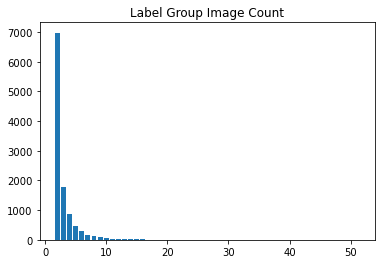

In [36]:
# Visualization of the Image_number count
plt.bar(imagecount["image_number"],imagecount["counts"])
plt.title('Label Group Image Count')

In [37]:
# Visualizing the max count label group 
tmpdf = traindf[traindf['label_group'] == sortlabel['label_group'].iloc[-1]]
tmpdf.head(10)

,posting_id,image,image_phash,title,label_group,path
1167,train_207039286,09165142230c0d600c02a66f62dbee5d.jpg,8b1cbc63e330c69d,Ready Stock - Gluta Collagen Soap By Beautetox...,159351600,./data/train_images/09165142230c0d600c02a66f62...
2069,train_1619338643,0ff3d417c454a614596da0f160e85b83.jpg,e3d894276a58c1de,GLUTA COLLAGEN SOAP BY BEAUTETOX SKINSUPERSTAR,159351600,./data/train_images/0ff3d417c454a614596da0f160...
2542,train_3721308865,136d7ea9fefe1cc04b6a8dfd965cbc9e.jpg,faad9752e4991162,KIRIM SETIAP HARI!! GLUTA COLLAGEN SOAP BEAUTE...,159351600,./data/train_images/136d7ea9fefe1cc04b6a8dfd96...
3140,train_1851882944,18244a8fdbb3aa0b5afb6c31d99134a5.jpg,e893a3d4a48d3973,[Ready & Resmi] Gluta Soap Beautetox Viral,159351600,./data/train_images/18244a8fdbb3aa0b5afb6c31d9...
3989,train_1236075269,1e4b5a9adc92e50df500e24d935fe0db.jpg,a0c4be17b3393693,READY STOK [THE3ANGLE-KD] Gluta Collagen Beaut...,159351600,./data/train_images/1e4b5a9adc92e50df500e24d93...
4024,train_2855329700,1e8f09fca97fca7c88a25afa618a10ff.jpg,b90ee0f1c6733b12,[READY SIAP KIRIM] GLUTA COLLAGEN SOAP,159351600,./data/train_images/1e8f09fca97fca7c88a25afa61...
4823,train_1997808959,24735427cab6ac1eb36180269ce0168e.jpg,ab6994b4b66a69c8,(DISKON 11-11 BURUAN ORDER) Sabun Whitening Gl...,159351600,./data/train_images/24735427cab6ac1eb36180269c...
4927,train_2840508723,25313d734a75035935dfc008aa0fc833.jpg,c0f79394b441afaa,[FREE JARING SABUN] Gluta Collagen Soap [READY],159351600,./data/train_images/25313d734a75035935dfc008aa...
5489,train_2729160884,296d7b2a49d7e94fbde30b9bf7d75447.jpg,94196fc571522f35,GLUTA COLLAGEN SOAP (ready) free jaring sabun,159351600,./data/train_images/296d7b2a49d7e94fbde30b9bf7...
5946,train_2902736490,2d0e11ade5ccb02845e71f27fd671ebd.jpg,c993a7ca34c49d33,READY STOCK FREE GIFT GLUTA COLLAGEN SOAP BEAU...,159351600,./data/train_images/2d0e11ade5ccb02845e71f27fd...


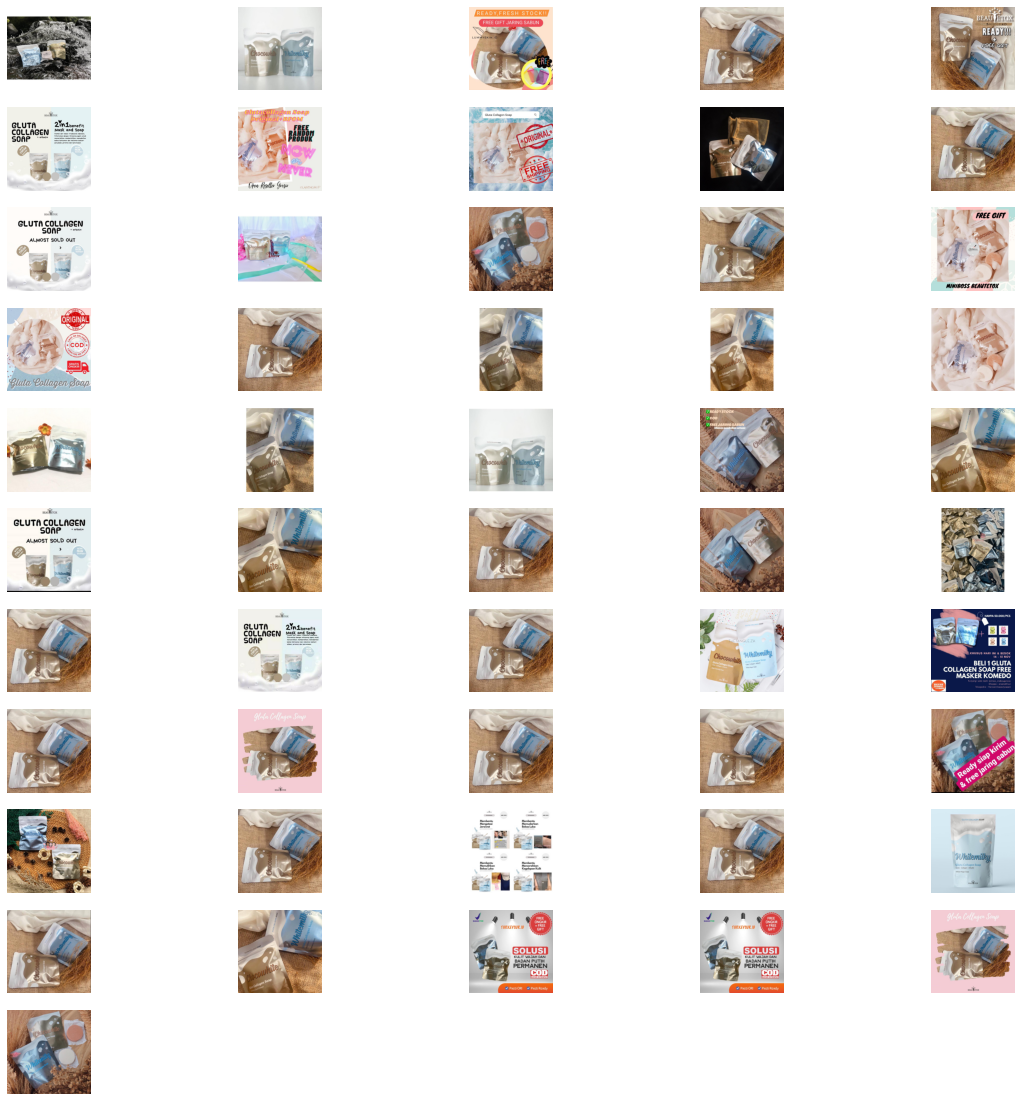

In [38]:
plt.figure(figsize=(20,20))

for num,a in enumerate(tmpdf["path"]):
    plt.subplot(11,5,num+1)
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)

### 2.2 Exploring the same images

In [39]:
imagegroup = traindf.groupby("image")["path"].count().reset_index()
imagegroup.columns=["image","counts"]
imagegroup

,image,counts
0,0000a68812bc7e98c42888dfb1c07da0.jpg,1
1,00039780dfc94d01db8676fe789ecd05.jpg,1
2,000a190fdd715a2a36faed16e2c65df7.jpg,1
3,00117e4fc239b1b641ff08340b429633.jpg,1
4,00136d1cf4edede0203f32f05f660588.jpg,1
...,...,...
32407,fff1c07ceefc2c970a7964cfb81981c5.jpg,1
32408,fff401691371bdcb382a0d9075dfea6a.jpg,1
32409,fff421b78fa7284284724baf249f522e.jpg,1
32410,fff51b87916dbfb6d0f8faa01bee67b8.jpg,1


In [40]:
tmpdf = imagegroup[imagegroup["counts"] > 1]
tmpdf.sort_values("counts")
tmpdf

,image,counts
11,001e11145b8e9bf5ac51110c0fdd8697.jpg,2
27,00416d439a613fb6cbede5cfc95176e6.jpg,2
54,007fca8ce9a042f9e1656ce8f96ba19d.jpg,2
55,0082c9c530852846a5f970ca1b8dc334.jpg,2
94,00d4a4865fa5c81896287fc2c3ea0e1d.jpg,2
...,...,...
32269,fedcf168ed642e9e9277523971f0376a.jpg,2
32285,fef0374b5f70970966a200bc05c44324.jpg,2
32354,ff8c51ae2b910bbd5b185932fafd81d5.jpg,2
32388,ffc7391f30199535379accf6862e1263.jpg,2


- The min and max for the same image are 2

In [41]:
# Get the first group of images that are identical 
tmpdf['image'].iloc[0]

'001e11145b8e9bf5ac51110c0fdd8697.jpg'

In [42]:
traindf[traindf['image'] == tmpdf['image'].iloc[0]]

,posting_id,image,image_phash,title,label_group,path
11,train_2496690777,001e11145b8e9bf5ac51110c0fdd8697.jpg,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932,./data/train_images/001e11145b8e9bf5ac51110c0f...
12,train_2771755203,001e11145b8e9bf5ac51110c0fdd8697.jpg,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932,./data/train_images/001e11145b8e9bf5ac51110c0f...


- posting_id is the same but all other columns are identical But should it have been duplicated?

In [43]:
# Verfy the next group of identical images
traindf[traindf['image'] == tmpdf['image'].iloc[1]]

,posting_id,image,image_phash,title,label_group,path
28,train_1572286671,00416d439a613fb6cbede5cfc95176e6.jpg,bb3fccc4c013c3e1,Pakaian Dalam Cewek Wings Bra Bra Tempel Seam...,532279668,./data/train_images/00416d439a613fb6cbede5cfc9...
29,train_3117535609,00416d439a613fb6cbede5cfc95176e6.jpg,bb3fccc4c013c3e1,WINGs BRA-BRA TEMPEL SEAMLESS - PUSH UP BRA - ...,532279668,./data/train_images/00416d439a613fb6cbede5cfc9...


- Here posting_id and title are different, possibly the title was edited

In [44]:
# Verify groups organized by image_phash 
traindf.groupby(["image","image_phash"])["path"].count().reset_index()

,image,image_phash,path
0,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,1
1,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,1
2,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,1
3,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,1
4,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,1
...,...,...,...
32407,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,1
32408,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,1
32409,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,1
32410,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,1


- The last row 3412 is the same, indicated that image and image_phash is unique throughout identical image groups

### Exploring Same image_phash

In [45]:
phashgroup = traindf.groupby("image_phash")["path"].count().reset_index()
phashgroup.columns=["image_phash","counts"]
phashgroup

,image_phash,counts
0,80007f7f073f5f0a,1
1,8000dffdb58fdac0,1
2,80047f78993fb3b2,1
3,80157fb63f6a0c6a,1
4,80171a153f6bafca,1
...,...,...
28730,fff24181c2a2d5e4,4
28731,fff24181c6a2d564,1
28732,fff888845373a48c,1
28733,fffa9a21e144d094,1


In [46]:
sortphashgroup = phashgroup.sort_values("counts")
sortphashgroup

,image_phash,counts
0,80007f7f073f5f0a,1
18602,e1ca869ec6969a9a,1
18601,e1c9c3979e18c3c6,1
18600,e1c99a34cfcf3038,1
18599,e1c9966069c3b6d9,1
...,...,...
26257,f6d98134b904b56b,16
21189,e992966d4ba49761,16
12714,be12e12f9ec1e198,17
16476,d0c0ea37bd9acce0,20


- We can see that there are multiple groups with the same impage_phash, with the max being 26

In [47]:
# Lets look at the max image_phash group
tmpdf = traindf[traindf["image_phash"] == sortphashgroup["image_phash"].iloc[-1]]
tmpdf

,posting_id,image,image_phash,title,label_group,path
579,train_1015625393,04a00bccb7f1560e755f5f1def73db59.jpg,fad28daa2ad05595,Sugar Baby Organic Healthy Cot Sheet Perlak Bayi,997220911,./data/train_images/04a00bccb7f1560e755f5f1def...
1978,train_1942146514,0f459b1e8aa89ee9e79b2ec95440e9c3.jpg,fad28daa2ad05595,Perlak Karet Organic Bayi Sugar Baby uk 90x60 ...,997220911,./data/train_images/0f459b1e8aa89ee9e79b2ec954...
1979,train_1720530417,0f459b1e8aa89ee9e79b2ec95440e9c3.jpg,fad28daa2ad05595,Perlak Karet Organik Bayi Sugar Baby uk 90x60 ...,997220911,./data/train_images/0f459b1e8aa89ee9e79b2ec954...
3916,train_1062957964,1dbf735adb93d54e6340af02f9b5472e.jpg,fad28daa2ad05595,MURAH!! SUGAR BABY Perlak (Perlak Karet Waterp...,997220911,./data/train_images/1dbf735adb93d54e6340af02f9...
3917,train_4124267548,1dbf735adb93d54e6340af02f9b5472e.jpg,fad28daa2ad05595,Sugar Baby Organic Healthy Cot Sheet - Perlak ...,997220911,./data/train_images/1dbf735adb93d54e6340af02f9...
5919,train_4270145275,2cd540e8c1810d1d1aaf3d73b8116cdc.jpg,fad28daa2ad05595,Perlak Bayi Sugar Baby (Alas Ompol Waterproof ...,997220911,./data/train_images/2cd540e8c1810d1d1aaf3d73b8...
8993,train_989190235,43af52158ed9acd8274a7d6d6c109dfc.jpg,fad28daa2ad05595,Perlak Waterproof Bayi SUGAR BABY 90 x 60 cm O...,997220911,./data/train_images/43af52158ed9acd8274a7d6d6c...
10768,train_3574291998,50ef370271e8c7e00eaaf018c9cd93dd.jpg,fad28daa2ad05595,Sugar Baby Pink Kitten Organic Healthy Cot She...,997220911,./data/train_images/50ef370271e8c7e00eaaf018c9...
12248,train_1943986671,5c1e0f695fb5ab7b0d83de0fef4bfdaf.jpg,fad28daa2ad05595,Perlak Bayi organik SUGAR BABY / Perlak karet ...,997220911,./data/train_images/5c1e0f695fb5ab7b0d83de0fef...
17760,train_3141138577,8591ed8b5bc268e386a66206bb233b2f.jpg,fad28daa2ad05595,Perlak Sugar Baby 90x60cm,997220911,./data/train_images/8591ed8b5bc268e386a66206bb...


- image_phash and label_group are the same, and image, title, and posting_id are different

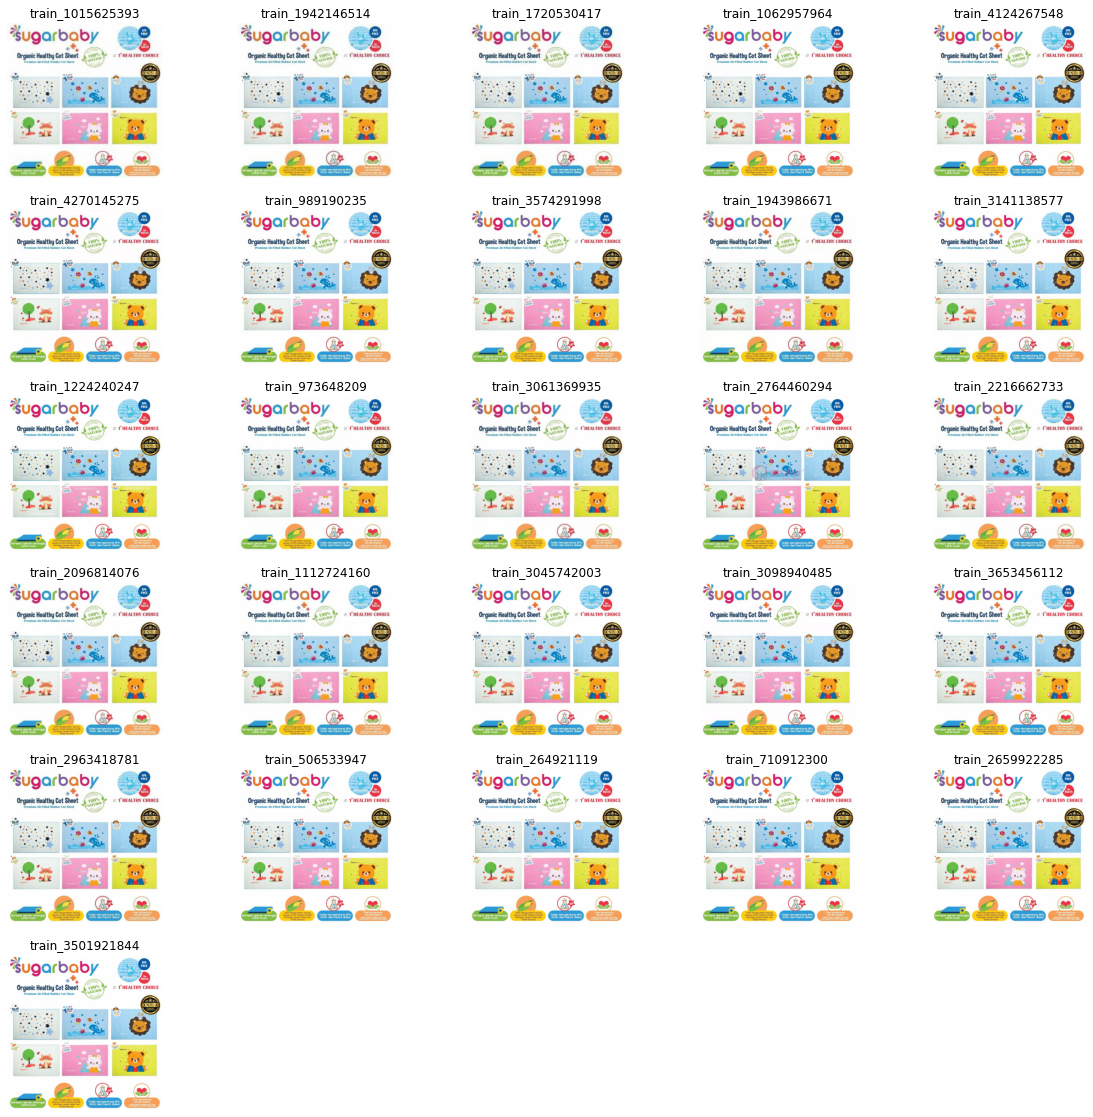

In [48]:
# Visulize the max image_phash group using max_counts

plt.figure(figsize=(20,20))

for num,a in enumerate(tmpdf["path"]):
    plt.subplot(6,5,num+1)
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.title(tmpdf["posting_id"].iloc[num])
    plt.imshow(img)

- While the images are labeled differently, we can see that they are the same image

### 2.3 Exploring Same Title 

In [49]:
titlegroup = traindf.groupby("title")["path"].count().reset_index()
titlegroup.columns=["title","counts"]
titlegroup

,title,counts
0,Mag Real Bubee Manual Breast Pump Powerful Ni...,1
1,""" Elektrik Hand Mixer Mini Milk Frother Pengad...",1
2,""" READY "" MS Glow Luminous Glowing Serum",1
3,""" TONER Arasta Kemasan Baru Sudah BPOM"" 100% ...",1
4,"""MITRAANDA88"" JAPAN QUALITY Panci Elektrik Mul...",1
...,...,...
33112,{TERMURAH TERLARIS} MODEL TALI SAMBUNG - BAHAN...,1
33113,{TERMURAH!!} Mukena luna maya rermurah ecer gr...,1
33114,{UKIR NAMA atau FOTO} BONEKA LZ Beruang Teddyb...,1
33115,| PALING LARIS | BUPENA KELAS 4 SD KURIKULUM 2...,1


In [50]:
sorttitle = titlegroup.sort_values("counts")
sorttitle

,title,counts
0,Mag Real Bubee Manual Breast Pump Powerful Ni...,1
21928,Q32 TWS HBQ Headset / F9 Earphones Bluetooth 5...,1
21927,Q32 TWS Bluetooth Headset 2pcs Sama Box Charge...,1
21926,Q32 TWS 5.0 Bluetooth Headset EDR Wireless Ste...,1
21925,Q202 Food Chopper Full Set - Blender Manual Ta...,1
...,...,...
17991,Monde Boromon Cookies 1 tahun+ 120gr,6
29202,Viva Air Mawar,6
755,100 Pcs Ikat Rambut Karet Polos Elastis Gaya K...,6
3423,Baju Koko Pria Gus Azmi Syubbanul Muslimin Kom...,8


- Max same title group is 9

In [51]:
# Visulaize max title group 
tmpdf = traindf[traindf["title"]==sorttitle["title"].iloc[-1]]
tmpdf

,posting_id,image,image_phash,title,label_group,path
11299,train_437123271,54ebc3ef04985b9f90e43fa6eaa14fa8.jpg,daa5b58127c83cda,Koko syubbanul muslimin koko azzahir koko baju,1241012862,./data/train_images/54ebc3ef04985b9f90e43fa6ea...
18979,train_1091145610,8f1310e4dfdb14d4f6e6e54814af8a56.jpg,fe84bef66060413b,Koko syubbanul muslimin koko azzahir koko baju,373863554,./data/train_images/8f1310e4dfdb14d4f6e6e54814...
22336,train_2035900367,a7b5b681b23b5834dfe0454f883697c5.jpg,cbe91696b54be148,Koko syubbanul muslimin koko azzahir koko baju,536452526,./data/train_images/a7b5b681b23b5834dfe0454f88...
23224,train_2183656041,ae64de9e8d31ae6d049581aec42e0442.jpg,be93e479811886f9,Koko syubbanul muslimin koko azzahir koko baju,1918908464,./data/train_images/ae64de9e8d31ae6d049581aec4...
25616,train_2886681369,bf9c11baa39f23f1d34cd1fe617af88c.jpg,9be469c17e8914cb,Koko syubbanul muslimin koko azzahir koko baju,373863554,./data/train_images/bf9c11baa39f23f1d34cd1fe61...
26425,train_1064632030,c5b2b6180559ea2f341c48527031aa33.jpg,ecf00f879904f0f9,Koko syubbanul muslimin koko azzahir koko baju,1918908464,./data/train_images/c5b2b6180559ea2f341c485270...
27834,train_3378928984,d0403c82fbb237857869ff14fb4c9765.jpg,e0bca5d826d8da87,Koko syubbanul muslimin koko azzahir koko baju,373863554,./data/train_images/d0403c82fbb237857869ff14fb...
29611,train_3767027123,ddd51a41c49b2fb6a4ad7b3b4e4566d9.jpg,c9af52bc94c95781,Koko syubbanul muslimin koko azzahir koko baju,1912222471,./data/train_images/ddd51a41c49b2fb6a4ad7b3b4e...
32475,train_556227538,f35f6a4960db6d9c589b2cf7e58f0de6.jpg,be945bd1c06ee690,Koko syubbanul muslimin koko azzahir koko baju,1663491238,./data/train_images/f35f6a4960db6d9c589b2cf7e5...


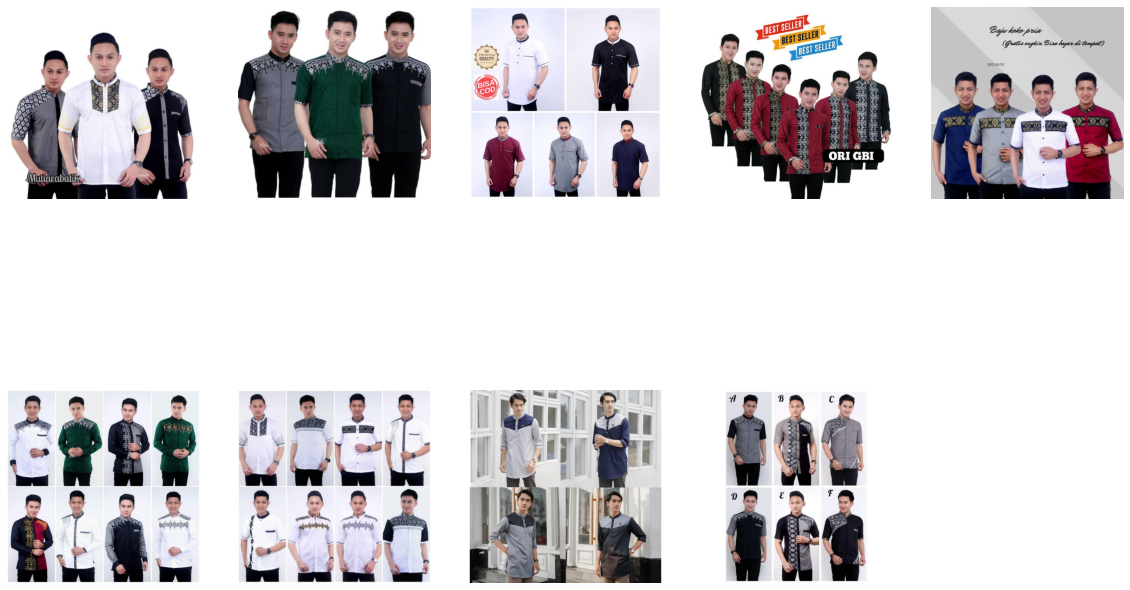

In [52]:
plt.figure(figsize=(20,20))

for num,a in enumerate(tmpdf["path"]):
    plt.subplot(3,5,num+1)
    img = cv2.imread(a)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.imshow(img)
    

- Same title but different images, thus, title is not a good measure to match images